In [36]:
import numpy as np 
import importlib
from scipy.io import loadmat
import NNClass
importlib.reload(NNClass)
from NNClass import NeuralNetwork as NN
from NNClass import mnistData as Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets

debug = False
from sklearn.metrics import classification_report

# Neural network runthrough.
First we generate the training and test data.

For sklearns mnist database:

In [37]:
print("[INFO] loading MNIST dataset from sklearn...")
digits = datasets.load_digits()
image = digits.data.astype("float")
image = (image - image.min()) / (image.max() - image.min())
print("[INFO] Total samples: {}, dim: {}".format(image.shape[0],
	image.shape[1]))

(trainX, testX, trainY, testY) = train_test_split(image,
	digits.target, test_size=0.25)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)
print("[INFO] Training samples: {}".format(trainX.shape[0]))


[INFO] loading MNIST dataset from sklearn...
[INFO] Total samples: 1797, dim: 64
[INFO] Training samples: 1347


For our own PCA dimension reduced mnist database:

In [38]:
print("[INFO] loading MNIST dataset from mnist_all...")
data = Data(debug,PCA = True,PCA_num=10)
file = "mnist_all.mat"
data_set = loadmat(file)
train_set, train_targets, test_set, test_targets = data.create_dataset(data_set)
train_set = train_set/255
test_set = test_set/255

train_targets = LabelBinarizer().fit_transform(train_targets)
test_targets = LabelBinarizer().fit_transform(test_targets)
num_samples = train_set.shape[0] + test_set.shape[0]
print("[INFO] samples: {}, dim: {}".format(num_samples,
	train_set.shape[1]))
print("[INFO] Training samples: {}".format(train_set.shape[0]))

[INFO] loading MNIST dataset from mnist_all...
[INFO] samples: 70000, dim: 10
[INFO] Training samples: 60000


For reduced PCA dimension reduced mnist dataset

In [39]:
print("[INFO] loading reduced MNIST dataset from sampled_data...")
file = "sampled_data.mat"
data_set_reduced = loadmat(file)
train_set_reduced, train_targets_reduced = data.reduced_dataset(data_set_reduced)
train_set_reduced = train_set_reduced/255
train_targets_reduced = LabelBinarizer().fit_transform(train_targets_reduced)

num_samples = train_set_reduced.shape[0] + test_set.shape[0]


print("[INFO] samples: {}, dim: {}".format(num_samples,
	train_set_reduced.shape[1]))
print("[INFO] Training samples: {}".format(train_set_reduced.shape[0]))

[INFO] loading reduced MNIST dataset from sampled_data...
[INFO] samples: 20000, dim: 10
[INFO] Training samples: 10000


We define the training data and the test data from the data set we want.

In [40]:
# training_data = trainX          # From MNIST data sklearn
# test_data = testX               # From MNIST data sklearn
# training_target = trainY        # From MNIST data sklearn
# test_target = testY             # From MNIST data sklearn

training_data = train_set       # From MNIST data set PCA
test_data = test_set            # From MNIST data set PCA
training_target = train_targets # From MNIST data set PCA
test_target = test_targets      # From MNIST data set PCA

# training_data = train_set_reduced       # From reduced MNIST data set PCA
# test_data = test_set                    # From reduced MNIST data set PCA
# training_target = train_targets_reduced # From reduced MNIST data set PCA
# test_target = test_targets              # From reduced MNIST data set PCA

print('Training data shape\t',training_data.shape)
print('Training targets shape\t',training_target.shape)
print('Test data shape\t\t',test_data.shape)
print('Test targets shape\t',test_target.shape)

Training data shape	 (60000, 10)
Training targets shape	 (60000, 10)
Test data shape		 (10000, 10)
Test targets shape	 (10000, 10)


Then we define the structure of the network.

In [41]:
inputSize = training_data.shape[1]
outputSize = training_target.shape[1]

Network_Size = [inputSize,
                # 32,
                # 16,
                64,
                outputSize]

print(Network_Size)

[10, 64, 10]


Then we initialize the network from the `NeuralNetwork` class.

Activation function can be:

'Sigmoid', 
'ReLu'

In [42]:
nn = NN(Network_Size,
        activation_func='Sigmoid',
        debug=debug,
        learning_rate=0.01,
        bias_output=False,
        early_stop=False)
nn.NNInfo()

Initializing..
Initializing done.  0m 0s
... Neural Network: ...
	 Network size: [10, 64, 10]
	 Activation function:  Sigmoid
	 Weights size:
	 	 Layer 0: (10, 64) ( 640 )
	 	 Layer 1: (64, 10) ( 640 )
	 Biases: (Output bias: False)
	 	 layer 1: 64


Now we train our network:

In [43]:
nn.fit( training_data,
        training_target,
        epochs=1000,
        update=10)

[INFO] epoch=1, loss=41549.5441248
[INFO] epoch=10, loss=35423.6724228
[INFO] epoch=20, loss=34584.1333812
[INFO] epoch=30, loss=34124.7583794
[INFO] epoch=40, loss=33858.0274362
[INFO] epoch=50, loss=33750.4332406
[INFO] epoch=60, loss=33629.2802566
[INFO] epoch=70, loss=33483.0136469
[INFO] epoch=80, loss=33397.4182277
[INFO] epoch=90, loss=33215.5526353
[INFO] epoch=100, loss=32984.4943554
[INFO] epoch=110, loss=32681.3370239
[INFO] epoch=120, loss=32499.0192312
[INFO] epoch=130, loss=32284.1119575
[INFO] epoch=140, loss=32143.6823557
[INFO] epoch=150, loss=32174.3318923
[INFO] epoch=160, loss=32234.3572135
[INFO] epoch=170, loss=32263.6234212
[INFO] epoch=180, loss=32357.5347287
[INFO] epoch=190, loss=32487.7689643
[INFO] epoch=200, loss=32571.1651591
[INFO] epoch=210, loss=32694.7292394
[INFO] epoch=220, loss=32797.5807518
[INFO] epoch=230, loss=32924.4262262
[INFO] epoch=240, loss=33015.6352471
[INFO] epoch=250, loss=33097.0953766
[INFO] epoch=260, loss=33181.1841518
[INFO] epoch

c:\Users\gusta\Documents\Universitetet\P7\NNPart2\NNClass.py:44: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-X))


[INFO] epoch=460, loss=33590.2112658
[INFO] epoch=470, loss=33626.4488172
[INFO] epoch=480, loss=33680.5683575
[INFO] epoch=490, loss=33797.0903926
[INFO] epoch=500, loss=33823.1303214
[INFO] epoch=510, loss=33813.4572942
[INFO] epoch=520, loss=33812.6743626
[INFO] epoch=530, loss=33833.6674764
[INFO] epoch=540, loss=33848.3502397
[INFO] epoch=550, loss=33876.6778086
[INFO] epoch=560, loss=33916.3915358
[INFO] epoch=570, loss=33887.2813993
[INFO] epoch=580, loss=33842.5790594
[INFO] epoch=590, loss=33814.2354180
[INFO] epoch=600, loss=33801.0673756
[INFO] epoch=610, loss=33816.9611621
[INFO] epoch=620, loss=33831.2285474
[INFO] epoch=630, loss=33850.0030127
[INFO] epoch=640, loss=33887.6562774
[INFO] epoch=650, loss=33906.5315324
[INFO] epoch=660, loss=33912.6915927
[INFO] epoch=670, loss=33929.7444610
[INFO] epoch=680, loss=33901.3827190
[INFO] epoch=690, loss=33865.4526126
[INFO] epoch=700, loss=33829.7503245
[INFO] epoch=710, loss=33788.0450048
[INFO] epoch=720, loss=33756.8574910
[

Now we use the test data to check our model.

In [44]:
print("[INFO] evaluating network...")
# for input in test_data:
predictions = nn.predict(test_data)
predictions = predictions.argmax(axis=1)

print(classification_report(test_target.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       980
           1       0.98      0.13      0.23      1135
           2       0.29      0.00      0.00      1032
           3       1.00      0.03      0.05      1010
           4       0.00      0.00      0.00       982
           5       0.10      0.00      0.01       892
           6       0.24      0.16      0.19       958
           7       0.00      0.00      0.00      1028
           8       0.18      0.40      0.25       974
           9       0.14      0.98      0.25      1009

    accuracy                           0.17     10000
   macro avg       0.39      0.17      0.10     10000
weighted avg       0.40      0.17      0.10     10000



c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

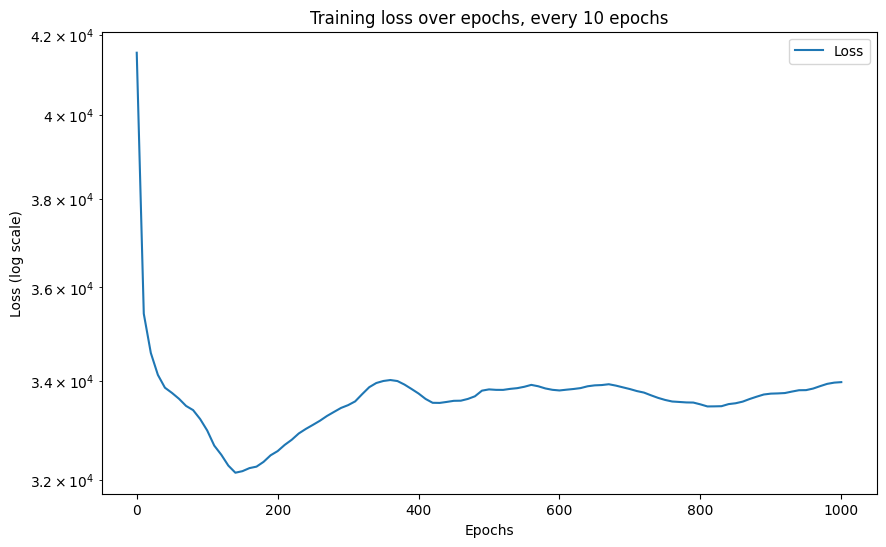

In [45]:
nn.plot_loss()